# Credit Card Fraud Detection

## Data Engineering

### import Libraries

In [47]:
import pandas as pd


### Read Data

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/train_new.csv')


### Describe Data

In [49]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed: 23,6006
0,781974,11/30/19 17:23,5.812930e+11,fraud_Donnelly LLC,entertainment,65.93,William,Thomas,M,39227 Mcpherson Shoals,...,1078,Podiatrist,10/6/89,f1f107d6db20f76d228eeabacb77988b,1354296218,35.465398,-98.819133,0,NaN,NaN
1,937737,1/8/20 17:36,4.653880e+15,fraud_Dibbert-Green,entertainment,61.72,Monica,Tucker,F,302 Christina Islands,...,6841,"Therapist, sports",6/6/99,a8b023b0612c922284eed043af002d6b,1357666563,37.496662,-86.764345,0,NaN,NaN
2,907828,12/28/19 17:48,2.131870e+14,"fraud_O'Reilly, Mohr and Purdy",home,81.11,Craig,Franco,M,9242 Vanessa Ramp Apt. 525,...,631,Futures trader,2/14/73,1ee25bbe5401e201a135f9ad4a894478,1356716895,40.039452,-90.699215,0,NaN,NaN
3,784628,12/1/19 4:04,4.990490e+12,"fraud_Johnston, Nikolaus and Maggio",grocery_net,73.17,Martin,Ford,M,56812 Francis Courts,...,626,Energy engineer,12/13/60,ec9459a7d8cb0c135e5a42332e8a72d2,1354334696,39.392946,-78.156633,0,NaN,NaN
4,662460,10/9/19 7:56,5.501080e+15,fraud_Fisher Inc,shopping_net,5.50,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,47772,Equities trader,1/4/66,e4b18127ccf31dd552d7609618aac64c,1349769383,40.364708,-82.388244,0,NaN,NaN


**Dataset Column Descriptions**

- **trans_date_trans_time**: The timestamp indicating when the transaction occurred (date and time).  
- **cc_num**: The credit card number used in the transaction.  
- **merchant**: The name or ID of the merchant where the transaction took place.  
- **category**: The type of business or service (e.g., groceries, electronics, fuel).  
- **amt**: The transaction amount (in currency).  
- **first**: The first name of the cardholder.  
- **last**: The last name of the cardholder.  
- **gender**: The gender of the cardholder (e.g., Male, Female).  
- **street**: The street address of the cardholder.  
- **city**: The city where the cardholder resides.  
- **state**: The state where the cardholder resides.  
- **zip**: The ZIP code of the cardholder’s address.  
- **lat**: The latitude of the cardholder’s residence.  
- **long**: The longitude of the cardholder’s residence.  
- **city_pop**: The population of the city where the cardholder lives.  
- **job**: The cardholder’s job title or occupation.  
- **dob**: The date of birth of the cardholder.  
- **trans_num**: A unique identifier for the transaction.  
- **unix_time**: The transaction time in UNIX timestamp format (seconds since January 1, 1970).  
- **merch_lat**: The latitude of the merchant’s location.  
- **merch_long**: The longitude of the merchant’s location.  
- **is_fraud**: A label indicating whether the transaction is fraudulent (1 = fraud, 0 = not fraud).  


In [50]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   trans_date_trans_time  1000 non-null   object 
 2   cc_num                 1000 non-null   float64
 3   merchant               1000 non-null   object 
 4   category               1000 non-null   object 
 5   amt                    1000 non-null   float64
 6   first                  1000 non-null   object 
 7   last                   1000 non-null   object 
 8   gender                 1000 non-null   object 
 9   street                 1000 non-null   object 
 10  city                   1000 non-null   object 
 11  state                  1000 non-null   object 
 12  zip                    1000 non-null   int64  
 13  lat                    1000 non-null   float64
 14  long                   1000 non-null   float64
 15  city_

In [51]:
df.shape

(1000, 25)

### Drop Unnecessary columns

🚫 Columns to Drop for Fraud Detection

- **first** and **last**: Cardholder names have no influence on fraud detection.  
- **gender**: Gender has no direct correlation with fraudulent activity.  
- **street**: Street address is unlikely to add value for fraud detection.  
- **zip**: ZIP codes are often redundant with city and state information.  
- **lat** and **long**: Redundant with `city` and `state` data.  
- **city_pop**: Population size doesn’t directly indicate fraud.  
- **job**: Irrelevant for predicting fraud.  
- **dob**: Age may be weakly correlated, but it usually has minimal impact.  
- **trans_num**: Just an identifier, not useful for modeling.  
- **unix_time**: Redundant with `trans_date_trans_time`.  


In [52]:
columns = [
    "trans_date_trans_time",
    "merchant",
    "category",
    "amt",
    "city",
    "state",
    "merch_lat",
    "merch_long",
    "is_fraud"
]

# Filter the relevant columns
df = df[columns]


In [53]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,city,state,merch_lat,merch_long,is_fraud
0,11/30/19 17:23,5.812930e+11,fraud_Donnelly LLC,entertainment,65.93,Lahoma,OK,35.465398,-98.819133,0
1,1/8/20 17:36,4.653880e+15,fraud_Dibbert-Green,entertainment,61.72,Smiths Grove,KY,37.496662,-86.764345,0
2,12/28/19 17:48,2.131870e+14,"fraud_O'Reilly, Mohr and Purdy",home,81.11,Smithfield,IL,40.039452,-90.699215,0
3,12/1/19 4:04,4.990490e+12,"fraud_Johnston, Nikolaus and Maggio",grocery_net,73.17,Corriganville,MD,39.392946,-78.156633,0
4,10/9/19 7:56,5.501080e+15,fraud_Fisher Inc,shopping_net,5.50,Cuyahoga Falls,OH,40.364708,-82.388244,0


### Checking null values

In [54]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
city,0
state,0
merch_lat,0
merch_long,0
is_fraud,0


In [55]:
from geopy.geocoders import Nominatim
import pandas as pd
import time


geolocator = Nominatim(user_agent="fraud_detection")

# Function for reverse geocoding
def reverse_geocode(lat, long):
    try:
        location = geolocator.reverse((lat, long), exactly_one=True, timeout=10)
        if location:
            address = location.raw.get('address', {})

            county = address.get('county', '')
            state = address.get('state', '')
            return county, state
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Apply reverse geocoding to create new columns
df[['merch_city', 'merch_state']] = df.apply(
    lambda row: pd.Series(reverse_geocode(row['merch_lat'], row['merch_long'])),
    axis=1
)

# Remove redundant columns
df.drop(['merch_lat', 'merch_long'], axis=1, inplace=True)




In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract features from datetime
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

# Drop the original datetime column
df = df.drop(columns=['trans_date_trans_time'])


label_encoders = {}
categorical_cols = ['merchant', 'category', 'city', 'state','merch_city','merch_state' ]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
numerical_cols = ['amt', 'hour', 'day_of_week', 'month', 'year']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



<ipython-input-56-5749063742f4>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [57]:
df.head()

,cc_num,merchant,category,amt,city,state,is_fraud,merch_city,merch_state,hour,day_of_week,month,year
0,5.812930e+11,109,0,-0.033035,265,35,0,120,37,0.590832,0.858399,1.155393,-0.346151
1,4.653880e+15,106,0,-0.057176,452,16,0,355,17,0.590832,-0.504860,-1.556797,2.888909
2,2.131870e+14,355,6,0.054012,451,13,0,56,13,0.590832,0.858399,1.426612,-0.346151
3,4.990490e+12,219,3,0.008482,110,19,0,38,51,-1.362579,1.312819,1.426612,-0.346151
4,5.501080e+15,134,11,-0.379557,119,34,0,260,36,-0.911792,-0.504860,0.884174,-0.346151


In [59]:
output_filename = "credit_card_fraud_mvp.csv"
df.to_csv(output_filename, index=False)

# Display confirmation message
print(f"DataFrame saved as '{output_filename}'")

DataFrame saved as 'credit_card_fraud_mvp.csv'


In [65]:
df.head()

,merchant,category,amt,city,state,is_fraud,merch_city,merch_state,hour,day_of_week,month,year
0,109,0,-0.033035,265,35,0,120,37,0.590832,0.858399,1.155393,-0.346151
1,106,0,-0.057176,452,16,0,355,17,0.590832,-0.504860,-1.556797,2.888909
2,355,6,0.054012,451,13,0,56,13,0.590832,0.858399,1.426612,-0.346151
3,219,3,0.008482,110,19,0,38,51,-1.362579,1.312819,1.426612,-0.346151
4,134,11,-0.379557,119,34,0,260,36,-0.911792,-0.504860,0.884174,-0.346151


In [67]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 11)
Test shape: (200, 11)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:04:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted

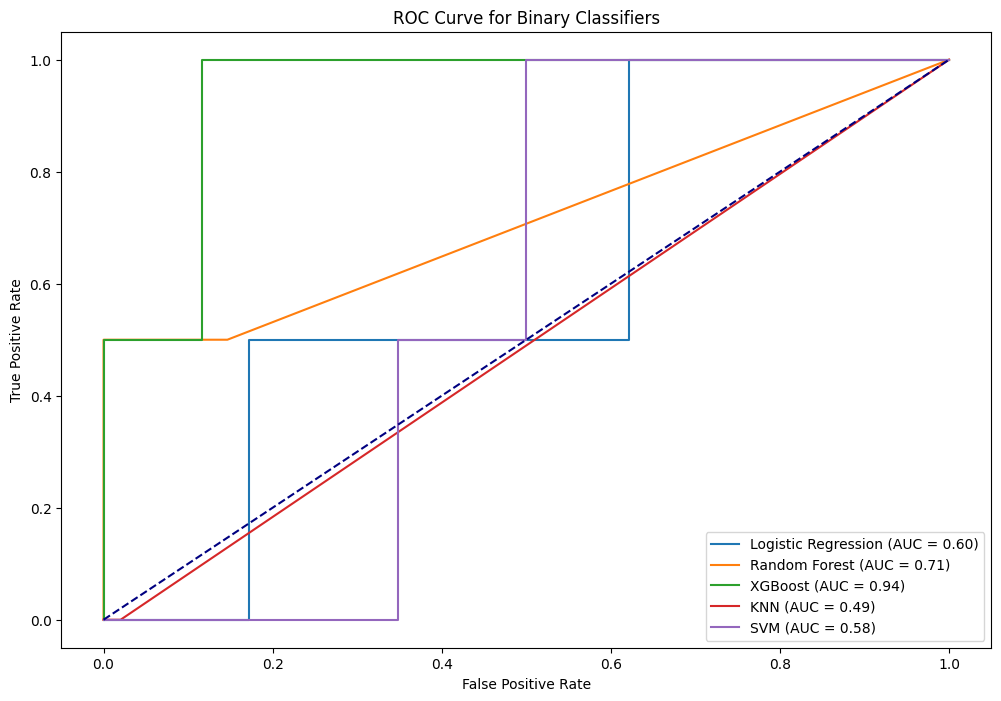


📊 Model Evaluation Results:
                 Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
0  Logistic Regression      0.99        0.0     0.0       0.0  0.603535
1        Random Forest      0.99        0.0     0.0       0.0  0.713384
2              XGBoost      0.99        0.0     0.0       0.0  0.941919
3                  KNN      0.99        0.0     0.0       0.0  0.489899
4                  SVM      0.99        0.0     0.0       0.0  0.575758


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42)
}


results = []


plt.figure(figsize=(12, 8))

for name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_score
    })

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classifiers")
plt.legend()
plt.show()


results_df = pd.DataFrame(results)
print("\n📊 Model Evaluation Results:")
print(results_df)
